# 21-Data_analysis

In [1]:
import os
import matplotlib.pyplot as plt
import string
import re
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
s = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/guoy20/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Document size

In [3]:
def convert_json_into_list(file):
    result = []
    try:
        list_file = eval( file)
        for line in list_file:
            result +=(str(list(line.values())[0]).split())
    except:
        pass
    
    return result

In [4]:
filenames = os.listdir('/home/guoy20/Data/json/Good')

In [5]:
classification = ['Good','Bad','Inter']

In [6]:
dictionary = {'Good':[],'Bad':[],'Inter':[]}
for c in classification:
    home_path = '/home/guoy20/Data/json/' + c
    filenames = os.listdir(home_path)
    for file in filenames:
        path =home_path + '/' + file
        try:
            with open(path) as user_file:
                file_contents = user_file.read() 
        except:
            continue
        r = convert_json_into_list(file_contents)
        dictionary[c].append(r)

In [7]:
len(dictionary['Inter'])

25

In [8]:
good_len = [len(i) for i in dictionary['Good']]
bad_len = [len(i) for i in dictionary['Bad']]
inter_len = [len(i) for i in dictionary['Inter']]

In [9]:
good_label = [2 for i in dictionary['Good']]
bad_label = [0 for i in dictionary['Bad']]
inter_label = [1 for i in dictionary['Inter']]

In [10]:
label = good_label + bad_label + inter_label
lens = good_len + bad_len + inter_len

(40.0, 1700.0)

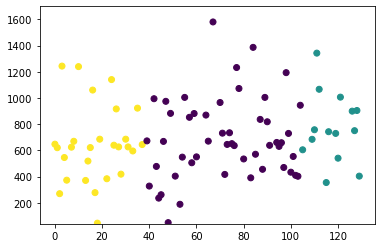

In [11]:
plt.scatter(list(range(len(lens))), lens,c = label)
plt.ylim((40,1700))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


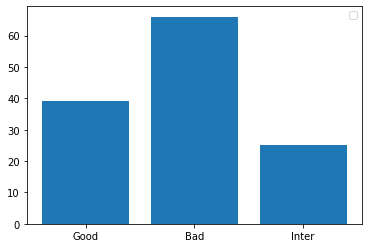

In [12]:
plt.bar(range(len(classification)),[len(dictionary[c]) for c in classification],tick_label=classification )
plt.legend()
plt.show()

### 2. Token frequency

In [13]:
# calculate the frequency of documents by classification

In [14]:
new_d = {'Good':[],'Bad':[],'Inter':[]}
frequency = {'Good':{},'Bad':{},'Inter':{}}
for c in classification:
    for document in dictionary[c]:
        new_doc = list(filter(lambda w: not w in s,document))
        
        for word in new_doc:
            if not bool(re.search(r'\d', word)) and (word not in string.punctuation) and word.isalpha():
                word = word.lower()
                try:
                    frequency[c][word] += 1
                except:
                    frequency[c][word] = 1
            new_d[c].append(new_doc)
        

In [15]:
#plot the histgram

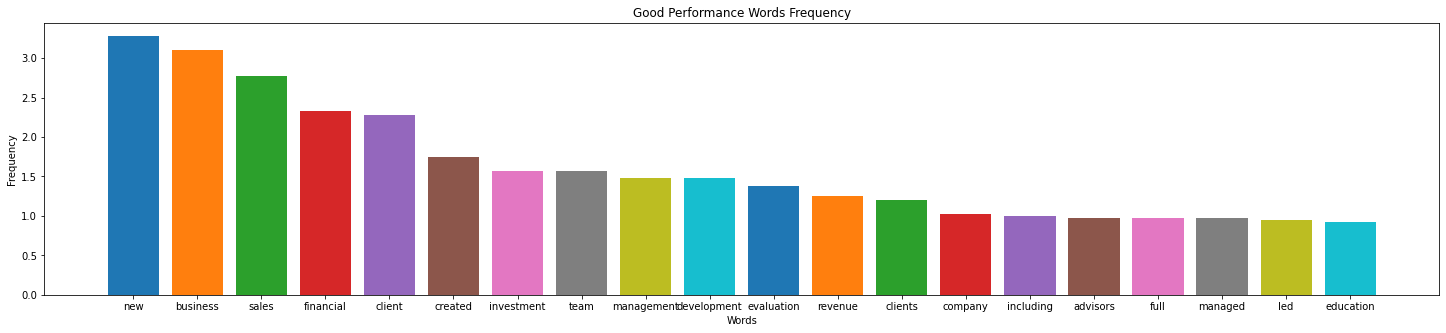

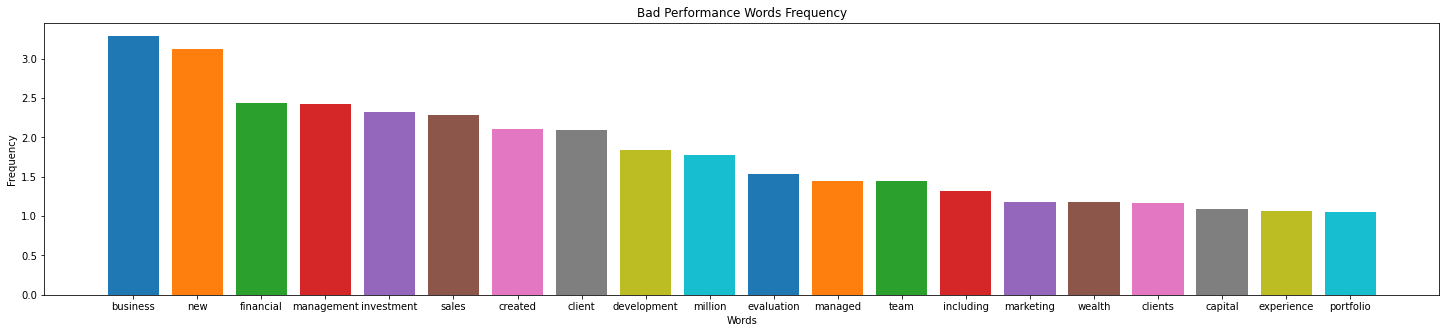

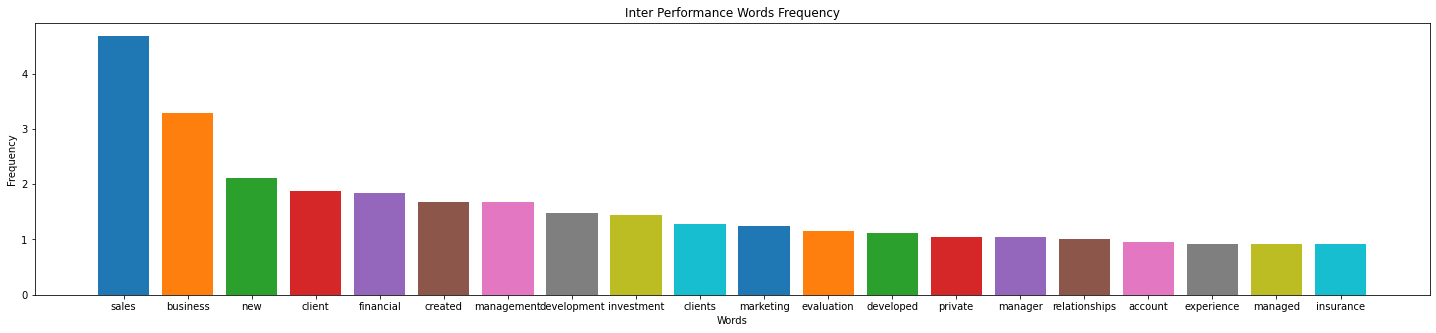

In [16]:
for c in classification:
    d = sorted(frequency[c].items(), key=lambda item: item[1],reverse = True)
    plt.figure(figsize = (25,5))

    for i in range(20):
        plt.bar(d[i][0],d[i][1]/len(dictionary[c]))
    plt.title(c + ' Performance Words Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Words')
    plt.show()

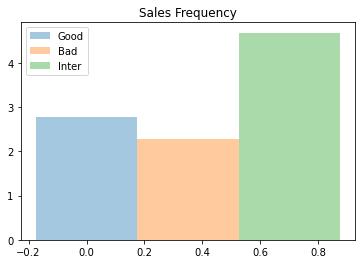

In [17]:
bar_width = 0.35
n = 0
for c in classification:
    d = sorted(frequency[c].items(), key=lambda item: item[1],reverse = True)
    for i in range(20):
        
        if d[i][0] == 'sales':
            plt.bar(bar_width *n,d[i][1]/len(dictionary[c]),bar_width,alpha = 0.4,label = c)
            n += 1
plt.legend()
plt.title('Sales Frequency')
plt.show()

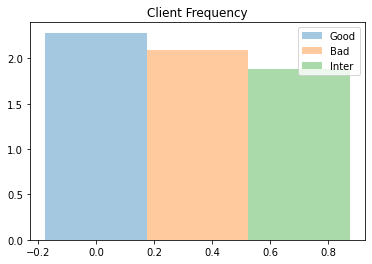

In [18]:
bar_width = 0.35
n = 0
for c in classification:
    d = sorted(frequency[c].items(), key=lambda item: item[1],reverse = True)
    for i in range(20):
        
        if d[i][0] == 'client':
            plt.bar(bar_width *n,d[i][1]/len(dictionary[c]),bar_width,alpha = 0.4,label = c)
            n += 1
plt.legend()
plt.title('Client Frequency')
plt.show()

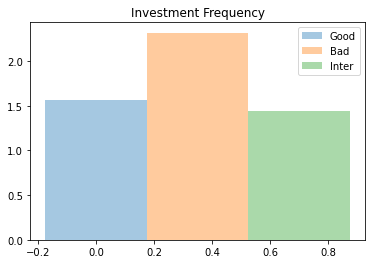

In [19]:
bar_width = 0.35
n = 0
for c in classification:
    d = sorted(frequency[c].items(), key=lambda item: item[1],reverse = True)
    for i in range(100):
        
        if d[i][0] == 'investment':
            plt.bar(bar_width *n,d[i][1]/len(dictionary[c]),bar_width,alpha = 0.4,label = c)
            n += 1
            break
plt.legend()
plt.title('Investment Frequency')
plt.show()

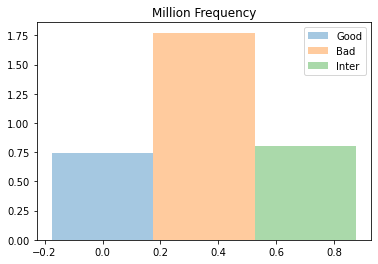

In [20]:
bar_width = 0.35
n = 0
for c in classification:
    d = sorted(frequency[c].items(), key=lambda item: item[1],reverse = True)
    for i in range(100):
        if d[i][0] == 'million':
            plt.bar(bar_width *n,d[i][1]/len(dictionary[c]),bar_width,alpha = 0.4,label = c)
            n += 1
            break
plt.legend()
plt.title('Million Frequency')
plt.show()

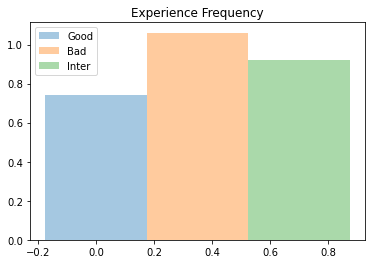

In [21]:
bar_width = 0.35
n = 0
for c in classification:
    d = sorted(frequency[c].items(), key=lambda item: item[1],reverse = True)
    for i in range(100):
        if d[i][0] == 'experience':
            plt.bar(bar_width *n,d[i][1]/len(dictionary[c]),bar_width,alpha = 0.4,label = c)
            n += 1
            break
plt.legend()
plt.title('Experience Frequency')
plt.show()

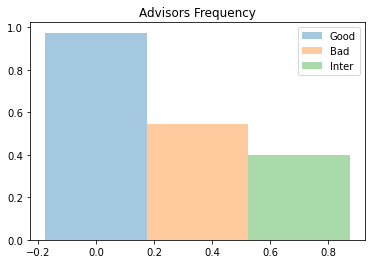

In [22]:
bar_width = 0.35
n = 0
for c in classification:
    d = sorted(frequency[c].items(), key=lambda item: item[1],reverse = True)
    for i in range(100):
        if d[i][0] == 'advisors':
            plt.bar(bar_width *n,d[i][1]/len(dictionary[c]),bar_width,alpha = 0.4,label = c)
            n += 1
            break
plt.legend()
plt.title('Advisors Frequency')
plt.show()

### 3. Emotion analysis

In [23]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion")

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")


/home/guoy20/.local/lib/python3.9/site-packages/transformers/models/auto/modeling_auto.py:1112: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [24]:
def get_emotion(text):
    input_ids = tokenizer.encode(str(text) + '</s>', return_tensors='pt')
    output = model.generate(input_ids=input_ids,
               max_length=2)
    dec = [tokenizer.decode(ids) for ids in output]
    label = dec[0]
    return label
get_emotion("") # Output: 'joy'
 
get_emotion("i have a feeling i kinda lost my best friend")

2023-02-22 18:08:38.849952: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-22 18:08:39.122750: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-22 18:08:39.122786: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-22 18:08:43.810091: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

'<pad> sadness'

In [25]:
def convert_json_into_list(file):
    result = []
    try:
        list_file = eval( file)
        for line in list_file:
            print(line)
    except:
        pass
    
    return result

In [26]:
home_path = '/home/guoy20/Data/json/'
result = {'Good':[],'Bad':[],'Inter':[]}
for c in classification:
    class_path = home_path + c
    filenames = os.listdir(class_path)
    c_class = []
    for file in filenames:
        l = []
        file_path = class_path +'/' + file
        try:
            with open(file_path) as user_file:
                file_contents = user_file.read()
            list_file = eval(file_contents)
            for line in list_file:
                l.append(get_emotion(list(line.values())[0]))
            c_class.append(l)
            
        except:
            continue
        result[c] = c_class
    
            

In [27]:
def calculate_density(l):
    s = 0
    d = {'joy':0,'fear':0,'sadness':0,'anger':0,'love':0}
    for i in l:
        try:
            d[i[6:]] += 1
        except:
            d[i[6:]] = 1
    n = sum(d.values())
    for i in d.keys():
        d[i] = d[i]/n
    return d

In [28]:
calculate_density(result['Good'][10])

{'joy': 0.6785714285714286,
 'fear': 0.17857142857142858,
 'sadness': 0.0,
 'anger': 0.14285714285714285,
 'love': 0.0}

In [29]:
emotion_joy = {'Good':[],'Bad':[],'Inter':[]}
emotion_anger = {'Good':[],'Bad':[],'Inter':[]}
emotion_fear = {'Good':[],'Bad':[],'Inter':[]}
emotion_sadness = {'Good':[],'Bad':[],'Inter':[]}
emotion_love = {'Good':[],'Bad':[],'Inter':[]}

In [30]:
len(result['Good'])

27

In [31]:
for c in classification:
    for i in result[c]:
        r = calculate_density(i)
        try:
            emotion_joy[c].append(r['joy'])
        except:
            emotion_joy[c]= emotion_joy[c]
        try:
            emotion_anger[c].append(r['anger'])
        except:
            emotion_anger[c]= emotion_anger[c]
        try:
            emotion_fear[c].append(r['fear'])
        except:
            emotion_fear[c]= emotion_fear[c]
        try:
            emotion_sadness[c].append(r['sadness'])
        except:
            emotion_sadness[c]= emotion_sadness[c]
        try:
            emotion_love[c].append(r['love'])
        except:
            emotion_love[c]= emotion_love[c]
        

In [32]:
len(result['Bad'])

50

In [33]:
len(emotion_anger['Bad'])

50

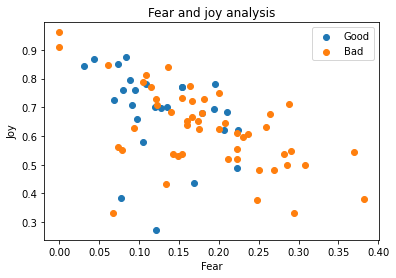

In [34]:
plt.scatter(emotion_fear['Good'],emotion_joy['Good'],label = 'Good')
#plt.scatter(emotion_fear['Inter'],emotion_joy['Inter'],label = 'Medium')
plt.scatter(emotion_fear['Bad'],emotion_joy['Bad'],label = 'Bad')
plt.xlabel('Fear')
plt.ylabel('Joy')
plt.legend()
plt.title('Fear and joy analysis')
plt.show()

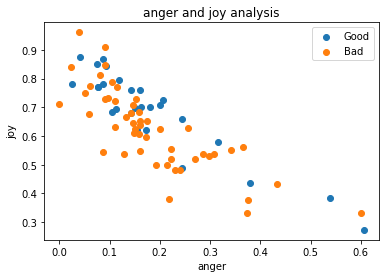

In [35]:
plt.scatter(emotion_anger['Good'],emotion_joy['Good'],label = 'Good')
#plt.scatter(emotion_anger['Inter'],emotion_joy['Inter'],label = 'Medium')
plt.scatter(emotion_anger['Bad'],emotion_joy['Bad'],label = 'Bad')
plt.xlabel('anger')
plt.ylabel('joy')
plt.legend()
plt.title('anger and joy analysis')
plt.show()

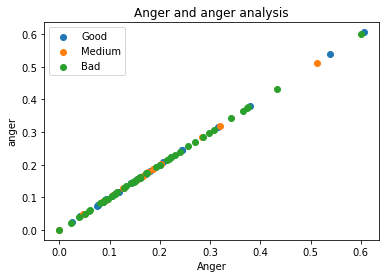

In [36]:
plt.scatter(emotion_anger['Good'],emotion_anger['Good'],label = 'Good')
plt.scatter(emotion_anger['Inter'],emotion_anger['Inter'],label = 'Medium')
plt.scatter(emotion_anger['Bad'],emotion_anger['Bad'],label = 'Bad')
plt.xlabel('Anger')
plt.ylabel('anger')
plt.legend()
plt.title('Anger and anger analysis')
plt.show()

### 4.number analysis

In [37]:
check = []
home_path = '/home/guoy20/Data/json/'
number_data = {'Good':[],'Bad':[],'Inter':[]}
for c in classification:
    class_path = home_path + c
    filenames = os.listdir(class_path)
    c_class = []
    for file in filenames:
        try:
            l = []
            file_path = class_path +'/' + file
        
            with open(file_path) as user_file:
                file_contents = user_file.read()
            list_file = eval(file_contents)
            for line in list_file:
                sentence = list(line.values())[0]
                if '$' in sentence:
                    t = sentence.split()
                    for word in t:
                        if '$' in word:
                            l.append(word)
            number_data[c].append(l)
            
        except:
            continue
            


/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot`

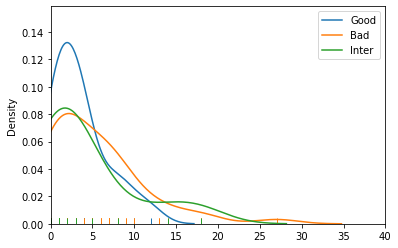

In [38]:
for c in classification:
    length = [len(i) for i in number_data[c]]
    sns.distplot(length, rug=True, hist=False,label = c)
plt.xlim(0,40)
plt.legend()
plt.show()

### 

In [39]:
check = []
home_path = '/home/guoy20/Data/json/'
number_data = {'Good':[],'Bad':[],'Inter':[]}
for c in classification:
    class_path = home_path + c
    filenames = os.listdir(class_path)
    c_class = []
    for file in filenames:
        try:
            l = []
            file_path = class_path +'/' + file
        
            with open(file_path) as user_file:
                file_contents = user_file.read()
            list_file = eval(file_contents)
            for line in list_file:
                sentence = list(line.values())[0]
                if '$' in sentence or '%' in sentence:
                    t = sentence.split()
                    for word in t:
                        if '$' in word or '%' in sentence:
                            l.append(word)
            number_data[c].append(l)
            
        except:
            continue
            


/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot`

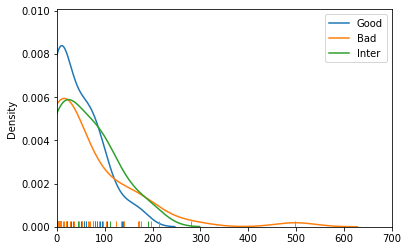

In [40]:
for c in classification:
    length = [len(i) for i in number_data[c]]
    sns.distplot(length, rug=True, hist=False,label = c)
plt.legend()
plt.xlim(0,700)
plt.show()

In [41]:
check = []
home_path = '/home/guoy20/Data/json/'
number_data = {'Good':[],'Bad':[],'Inter':[]}
for c in classification:
    class_path = home_path + c
    filenames = os.listdir(class_path)
    c_class = []
    for file in filenames:
        try:
            l = []
            file_path = class_path +'/' + file
        
            with open(file_path) as user_file:
                file_contents = user_file.read()
            list_file = eval(file_contents)
            for line in list_file:
                sentence = list(line.values())[0]
                if '%' in sentence:
                    t = sentence.split()
                    for word in t:
                        if '%' in sentence:
                            l.append(word) 
            number_data[c].append(l)
            
        except:
            continue
            


/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot`

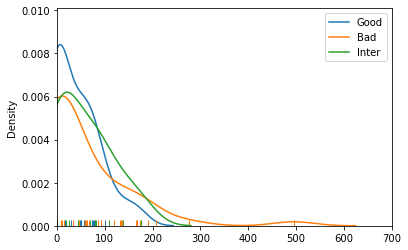

In [42]:
for c in classification:
    length = [len(i) for i in number_data[c]]
    sns.distplot(length, rug=True, hist=False,label = c)
plt.legend()
plt.xlim(0,700)
plt.show()

In [ ]:
home_path = '/home/guoy20/Data/json/'
sentence_examples = {'joy':[],'anger':[],'fear':[]}
for c in classification:
    class_path = home_path + c
    filenames = os.listdir(class_path)
    c_class = []
    for file in filenames:
        l = []
        file_path = class_path +'/' + file
        try:
            with open(file_path) as user_file:
                file_contents = user_file.read()
            list_file = eval(file_contents)
            for line in list_file:
                l.append(get_emotion(list(line.values())[0]))
                emotion = get_emotion(list(line.values())[0])
                if emotion == '<pad> joy':
                    sentence_examples['joy'].append(line)
                elif emotion == '<pad> anger':
                    sentence_examples['anger'].append(line)
                elif emotion == '<pad> fear':
                    sentence_examples['fear'].append(line)
            c_class.append(l)
            
        except:
            continue
        emotion_score = calculate_density (l)
        if emotion_score['anger'] > 0.25:
            print(c,file)
        

Good 127. Septimus, Joseph - Bio.json


In [44]:
sentence_examples['fear']

[{'\xa0': '11\\/2012-Present MassMutual Financial Group Seattle, WA\xa0 '},
 {'\xa0': 'Wealth Advisor\xa0 '},
 {'\xa0': 'by the top 15% of 5,700 advisors nationwide\xa0 '},
 {'\xa0': '6\\/2005-11\\/2012 The Lyman Group (M Financial) Seattle, WA\xa0 '},
 {'\xa0': '6\\/2005-11\\/2012 Keever Capital (M Financial) Seattle, WA\xa0 '},
 {'\xa0': 'Associate\xa0 '},
 {'\xa0': '▪ Managed over 50 client relationships with assets in excess of $85MM\xa0 '},
 {'\xa0': '12\\/2004-6\\/2005 MassMutual Financial Seattle, WA\xa0 '},
 {'\xa0': 'Financial Services Professional\xa0 '},
 {'\xa0': 'EDUCATION '},
 {'\xa0': '1999-2004 University of Washington Seattle, WA\xa0 '},
 {'\xa0': '▪ FINRA Series 7, 63, 65\xa0 '},
 {'\xa0': 'ISSAQUAH, WA '},
 {'\xa0': '2643 E Norris St. Philadelphia, PA 19125 '},
 {'\xa0': 'New Jersey Department of Education (NJ DOE) '},
 {'\xa0': 'Camden City School District '},
 {'\xa0': 'EDUCATION '},
 {'\xa0': 'www.ECGresources.com '},
 {'\xa0': 'Education: \xa0'},
 {'\xa0': 'Maste

In [47]:
sentence_examples['joy']

[{'\xa0': 'Evaluation Only. Created with Aspose.Words. Copyright 2003-2023 Aspose Pty Ltd.'},
 {'\xa0': 'OBJECTIVE – FINANCIAL ADVISOR '},
 {'\xa0': 'Relationship focused and tenacious professional consistently instilling the utmost\xa0 confidence in clients and partners alike. Maximizes people and business potential\xa0 by embracing ambiguity and making the complex simple. Unique ability to focus\xa0 on details while incorporating big picture strategy and vision.\xa0 '},
 {'\xa0': 'Constantly exhibits integrity, loyalty, and professionalism in a personable and\xa0 polished manner. These attributes have led to proven results throughout the\xa0 client acquisition and service cycles. '},
 {'\xa0': 'PROFESSIONAL EXPERIENCE '},
 {'\xa0': 'Engage directly with businesses and HNW individuals to cultivate and fully\xa0 implement comprehensive financial strategies. Incorporate client’s internal and\xa0 external advisors to ensure complete coordination across the full spectrum of\xa0 client fin